# Homework 3

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Original image

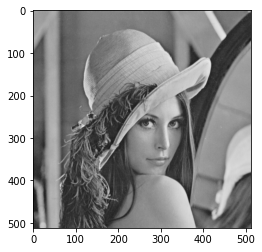

In [2]:
img = cv2.imread('lena.bmp')
plt.imshow(img)
plt.show()

### Histogram

In [3]:
def generate_histogram(img):
    hist = np.zeros(256, dtype=int)
    
    for img_row in img:
        for pixel in img_row:
            hist[pixel] += 1
    
    return hist

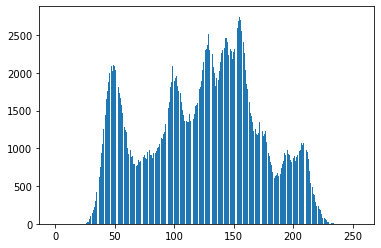

In [4]:
hist = generate_histogram(img)
plt.bar(range(0, 256), hist)
plt.show()

### Image with intensity divided by 3 and its histogram

In [5]:
def divided_by_3(img):
    return img // 3

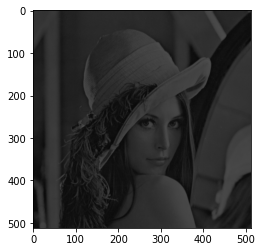

In [6]:
divided = divided_by_3(img)
plt.imshow(divided)
plt.show()

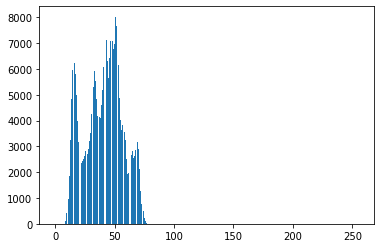

In [7]:
divided_hist = generate_histogram(divided)
plt.bar(range(0, 256), divided_hist)
plt.show()

### Image after applying histogram equalization to above and its histogram

In [8]:
def histogram_equalization(img, hist):
    processed_img = img.copy()
    cdf = [0 for _ in range(256)]
    cur_cdf = 0.0
    max_idx = np.iinfo(np.int32).min
    min_idx = np.iinfo(np.int32).max
    
    # calculating the distribution function
    for i, h in enumerate(hist):
        if not h: continue
        
        max_idx = max(max_idx, i)
        min_idx = min(min_idx, i)
        cur_cdf += h
        cdf[i] = cur_cdf
            
    # histogram equalization mapping
    vmap = [0 for _ in range(256)]
    for v in range(len(cdf)):
        vmap[v] = int((cdf[v]-cdf[min_idx]) / (cdf[max_idx]-cdf[min_idx]) * 255)
    
    # process image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            processed_img[i, j] = vmap[processed_img[i, j, 0]]
            
    return processed_img

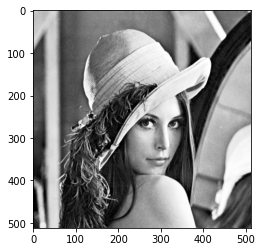

In [9]:
hist_eq = histogram_equalization(divided, divided_hist)
plt.imshow(hist_eq)
plt.show()

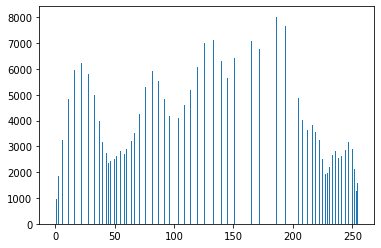

In [10]:
hist_eq_hist = generate_histogram(hist_eq)
plt.bar(range(0, 256), hist_eq_hist)
plt.show()